### Team members

##### Chirag Bhuvaneshwara
* 2571703
* s8chbhuv@stud.uni-saarland.de

##### Priyasha Chatterjee 
* 2572739
* s8prchat@stud.uni-saarland.de

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import sounddevice as sd
from scipy.io import wavfile
import random
from numpy import linalg as LA

In [135]:
f1 = "signals/Sensor1.wav"
f2 = "signals/Sensor2.wav"
f3 = "signals/Sensor3.wav"

In [136]:
fs, sensor1 = wavfile.read(f1)
fs, sensor2 = wavfile.read(f2)
fs, sensor3 = wavfile.read(f3)

In [137]:
# sd.play(sensor1, fs)

In [138]:
fs/60

183.75

# 1.1 Cross Correlation: Naive v/s DFT

Intuitive Meaning of Cross Correlation:
We know that correlation is a measure of how much a given signal correlates with, or resembles, another. Cross correlation is also a measure of similarity of two signals, as a function of displacement of one with respect to the other. Looking at the equation, we can see that it has a similar nature to convolution, only differing in that it does not require the other signal to be flipped, but only time-shifted. 


Asymptotic running time:

- For Naive implementation: O(n^2).
- For DFT implementation: O(n log n).

where n is the length of the input signal.

The asymptotic running time of the DFT implementation is better than the naive implementation because each DFT is O(n log n), multiplication of the 2 signals in the Fourier domain is O(n^2) and finally the IDFT is again O(n log n). 

==> O(n log n) + O(n log n) + O(n) + O(n log n) = O(n log n) for the whole DFT implementation of cross correlation.


# 1.2 Circular Cross Correlation and DFT

In [184]:
def crossCorrelation(signal1, signal2, verbose = True):
    
    time1 = time.time()
    
    print("FFT: Signal1:", np.fft.fft(signal1))
    
    signal1 = np.conj(np.fft.fft(signal1))
    print("Conj:", signal1)
    signal2 = np.fft.fft(signal2)
    print("FFT Signal 2:", signal2)

    res = signal1 * signal2
    
    print("Result:",res)
    res = np.fft.ifft(res)
    print("IFFT:", res)
    
    time2 = time.time()
    if verbose == True:
        print('Cross correlation with DFT took {:.3f} ms'.format((time2-time1)*1000.0))
    
    return res

In [185]:
np.array([1.5,9]) * np.array([2,2])

array([ 3., 18.])

In [186]:
crCor = crossCorrelation(sensor1, sensor2)

FFT: Signal1: [-8.75079900e+06     +0.j          5.48523812e+05+238324.71001205j
 -5.92041277e+03 -29792.47328257j ... -4.75364245e+04+226000.19483327j
 -5.92041277e+03 +29792.47328257j  5.48523812e+05-238324.71001205j]
Conj: [-8.75079900e+06     -0.j          5.48523812e+05-238324.71001205j
 -5.92041277e+03 +29792.47328257j ... -4.75364245e+04-226000.19483327j
 -5.92041277e+03 -29792.47328257j  5.48523812e+05+238324.71001205j]
FFT Signal 2: [-1.24462080e+07     +0.j          7.83584960e+05-340670.32533058j
 -8.49585699e+03 +42751.19541156j ... -6.77495129e+04-323159.42235921j
 -8.49585699e+03 -42751.19541156j  7.83584960e+05+340670.32533058j]
Result: [ 1.08914265e+14+0.00000000e+00j  3.48624853e+11-3.73613444e+11j
 -1.22336487e+09-5.06217316e+08j ... -6.98135228e+10+3.06732466e+10j
 -1.22336487e+09+5.06217316e+08j  3.48624853e+11+3.73613444e+11j]
IFFT: [4.52411287e+10-4.01281646e-07j 1.71521912e+10+2.95096544e-06j
 2.33751411e+10+1.64303085e-06j ... 1.92445258e+10-3.30857979e-06j
 4.7

In [187]:
crCor

array([4.52411287e+10-4.01281646e-07j, 1.71521912e+10+2.95096544e-06j,
       2.33751411e+10+1.64303085e-06j, ...,
       1.92445258e+10-3.30857979e-06j, 4.72174095e+10-5.11960152e-06j,
       6.39741780e+10-1.37235296e-06j])

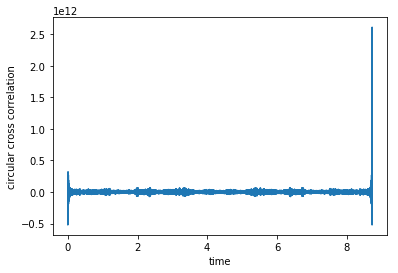

In [151]:
timeVals = [i/fs for i in range(len(crCor))]
plt.plot(timeVals, crCor)
plt.xlabel("time")
plt.ylabel("circular cross correlation")
plt.show()

In [153]:
# crCorForSec = [crCor[i] for i in range(0,len(crCor),fs) ]
# timeVals = [i for i in range(len(crCorForSec))]
# plt.plot(timeVals, crCorForSec)
# plt.xlabel("time in seconds")
# plt.ylabel("circular cross correlation")
# plt.show()

## What does max val of cross correlation mean?

Cross correlation is calculated by shifting one of the signals and doing a dot product with the other signal. So , maximum value of cross correlation implies that the two signals are matching for that particular shift. This means that the peaks of the shifted signal and the peaks of the other signals are matching which maximises the area under the curve resulting from cross correlation.

In our particular case, cross correlation is highest when time t = 8.5s and it decreases for other values of t.

# 1.3 GCC-PATH correlation

1.3

GCC-PHAT stands for General Cross Correlation with Phase Transform. This is used for computing the time delay between the reference channel and another channel, for a given segment. The GCC-PHAT is estimated as the delay that causes the cross correlation between the two segments to be maximum. 
One of the most significant factors to keep in mind is the analysis window size in relation to the segment size – a small analysis window degrades the cross-correlation estimation, while a large window reduces the resolution of changes in the time delay of arrival (TDOA).
The maximum value of the inverse Fourier Transform of the GCC PHAT gives the estimated delay for a particular segment, but this maximum value is avoided in three cases, when the maximum could be due to a spurious noise, when two or more speakers overlap each other, and when the processed segment comprises a lot of acoustic data that isn’t speech.


In [154]:
def gpath(signal1, signal2):
    
    signal1 = np.fft.fft(signal1)
    signal2 = np.conj(np.fft.fft(signal2))
    
    N = len(signal1)
    
    gpath = np.zeros(N)
    for f in range(N):
        gpath[f] = (signal1[f] * signal2[f])/ abs(signal1[f]*np.conj(signal2[f]))
    
    return gpath

In [155]:
gcc = gpath(sensor1, sensor2)

/home/chirag/anaconda3/envs/DSP/lib/python3.6/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [156]:
gcc

array([1.        , 0.99999996, 0.99999999, ..., 0.99999963, 0.99999999,
       0.99999996])

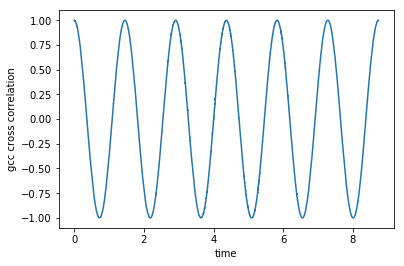

In [157]:
timeVals = [i/fs for i in range(len(gcc))]
plt.plot(timeVals, gcc)
plt.xlabel("time in seconds")
plt.ylabel("gcc cross correlation")
plt.show()

In [158]:
# gccForSec = [gcc[i] for i in range(0,len(gcc),fs) ]
# timeVals = [i for i in range(len(gccForSec))]
# # print(gccForSec.shape)
# # print()
# plt.plot(timeVals, gccForSec)
# plt.xlabel("time")
# plt.ylabel("gcc cross correlation")
# plt.show()

# 2.1 Microphone Array

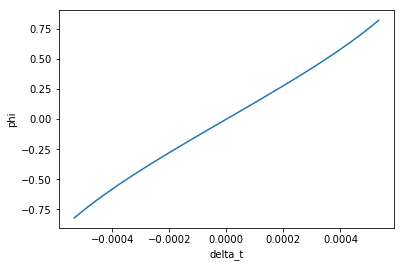

In [202]:
fs = 45* (10**3)
Ts = 1/fs
delta_x = .25
c = 343

delta_t_vals = [m*Ts for m in range(-24,25)]

phi_vals = [math.asin((c*delta_t)/delta_x) for delta_t in delta_t_vals]

plt.plot(delta_t_vals, phi_vals)
plt.xlabel("delta_t")
plt.ylabel("phi")
plt.show()

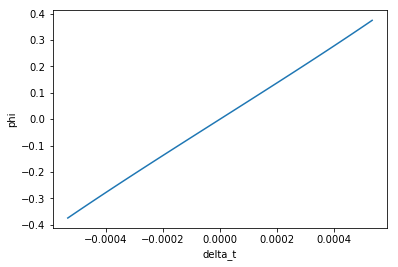

In [203]:
fs = 45* (10**3)
Ts = 1/fs
delta_x = .5
c = 343

delta_t_vals = [m*Ts for m in range(-24,25)]

phi_vals = [math.asin((c*delta_t)/delta_x) for delta_t in delta_t_vals]

plt.plot(delta_t_vals, phi_vals)
plt.xlabel("delta_t")
plt.ylabel("phi")
plt.show()

## What is the maximum angle where the sound can be located ?

Given that for time delay t,
Δt = Δx. Sin (Ф)/c
Sin (Ф) = (Δt . c)/ Δx

Given values Δx = 0.25m, c = 343 m/s, fs = 45kHz 
Also given Δt = m.Ts = m. (1/fs)

- Sin (Ф) = (m x 0.00002 x 343)/0.25 = m x 0.00030489

Changing Δx to 0.5 m, 
- Sin (Ф) = (m x 0.00002 x 343)/0.5 = m x 0.015244

For a frequency of 900 Hz, and Δx = 0.25m,
- Sin (Ф) = (m x 0.0011 x 343)/0.25 = m x 1.52
- Ф =  (m x 1.52)

Since Sin Ф can take a max value of 1, 
- Ф =  Sin^-1 (1)
- The maximum angle where sound can be located is: $\pi / 2 $


# 2.2 Locate the speaker

In [189]:
gcc1 = gpath(sensor1, sensor2)
gcc2 = gpath(sensor1, sensor3)
gcc3 = gpath(sensor2, sensor3)

/home/chirag/anaconda3/envs/DSP/lib/python3.6/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [198]:
print(gcc1)
print(gcc2)
print(gcc3)

[1.         0.99999996 0.99999999 ... 0.99999963 0.99999999 0.99999996]
[ 1.         -0.05858273  0.9668648  ...  0.62136763  0.9668648
 -0.05858273]
[ 1.         -0.05887866  0.96683298 ...  0.62069569  0.96683298
 -0.05887866]


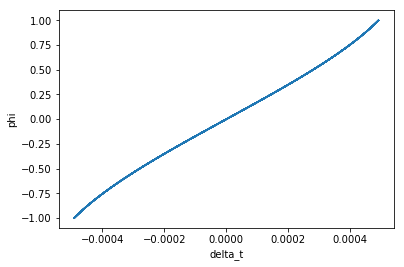

In [205]:
fs = 45* (10**3)
Ts = 1/fs
delta_x = .2
c = 343

delta_t_vals = [(delta_x*math.sin(phi))/c for phi in gcc1]

phi_vals = gcc1

plt.plot(delta_t_vals, phi_vals)
plt.xlabel("delta_t")
plt.ylabel("phi")
plt.show()

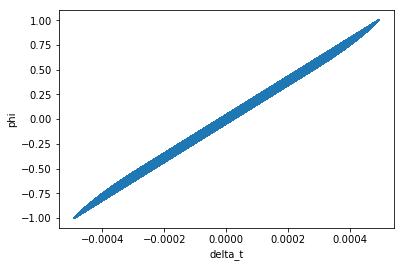

In [206]:
fs = 45* (10**3)
Ts = 1/fs
delta_x = .2
c = 343

delta_t_vals = [(delta_x*math.sin(phi))/c for phi in gcc2]

phi_vals = gcc2

plt.plot(delta_t_vals, phi_vals)
plt.xlabel("delta_t")
plt.ylabel("phi")
plt.show()

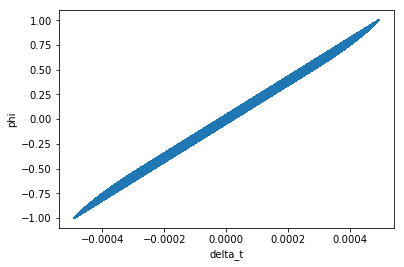

In [207]:
fs = 45* (10**3)
Ts = 1/fs
delta_x = .2
c = 343

delta_t_vals = [(delta_x*math.sin(phi))/c for phi in gcc3]

phi_vals = gcc3

plt.plot(delta_t_vals, phi_vals)
plt.xlabel("delta_t")
plt.ylabel("phi")
plt.show()

The location of the speaker for the given case is unique in 3D. A microphone array is set up in a way that allows detection over a particular range, in a given direction. The system here is a triangular microphone array with three sensors collecting speaker information, which leads to triangulation of speaker location to a unique position in the grid covered by the microphone array. If the speaker was the move, then speaker localisation methods would have needed to be implemented, which is not the case here. 
